In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

import warnings
import os
warnings.filterwarnings('ignore')

In [2]:
# %config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator, LogLocator
from IPython.display import display as op

In [3]:
data_path = './CoverMyMeds_data/'

## Load the data

In [4]:
## Bridge table
df_bridge = pd.read_csv(data_path + 'bridge.csv')

## All date-level information
df_date = pd.read_csv(data_path + 'dim_date.csv')

## All rejected (PA) claim
df_pa = pd.read_csv(data_path + 'dim_pa.csv')

## All claims
df_claims = pd.read_csv(data_path + 'dim_claims.csv')

## Merge two dataframes

In [5]:
## pd.merge will only retain the intersections of dataframes (no duplicated information)
df_bridge_claims = pd.merge(df_bridge, df_claims)

print('---------------------------------------\n' + 'Bridge information + All claims')
op(df_bridge_claims)

---------------------------------------
Bridge information + All claims


,dim_claim_id,dim_pa_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved
0,1,1.0,1,417380,A,75.0,0
1,2,NaN,1,999001,A,NaN,1
2,3,2.0,1,417740,A,76.0,0
3,4,NaN,1,999001,A,NaN,1
4,5,NaN,1,417740,A,NaN,1
...,...,...,...,...,...,...,...
1335571,1335572,555950.0,1095,417740,C,75.0,0
1335572,1335573,NaN,1095,999001,C,NaN,1
1335573,1335574,555951.0,1095,417380,C,70.0,0
1335574,1335575,NaN,1095,999001,C,NaN,1


# All information for rejected (PA) claims

In [6]:
df_pa_bridge_claims = pd.merge(df_bridge_claims, df_pa)
df_pa_bridge_claims

,dim_claim_id,dim_pa_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved,correct_diagnosis,tried_and_failed,contraindication,pa_approved
0,1,1.0,1,417380,A,75.0,0,1,1,0,1
1,3,2.0,1,417740,A,76.0,0,1,0,0,1
2,10,3.0,1,417380,A,75.0,0,0,0,1,1
3,11,4.0,1,999001,A,76.0,0,1,1,0,1
4,15,5.0,1,417614,A,70.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
555946,1335557,555947.0,1095,417380,C,70.0,0,1,0,1,0
555947,1335558,555948.0,1095,417740,C,75.0,0,1,0,1,1
555948,1335559,555949.0,1095,417740,C,75.0,0,1,1,1,1
555949,1335572,555950.0,1095,417740,C,75.0,0,1,0,0,1


In [11]:
df_pa_bridge_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555951 entries, 0 to 555950
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   dim_claim_id             555951 non-null  int64  
 1   dim_pa_id                555951 non-null  float64
 2   dim_date_id              555951 non-null  int64  
 3   bin                      555951 non-null  int64  
 4   drug                     555951 non-null  object 
 5   reject_code              555951 non-null  float64
 6   pharmacy_claim_approved  555951 non-null  int64  
 7   correct_diagnosis        555951 non-null  int64  
 8   tried_and_failed         555951 non-null  int64  
 9   contraindication         555951 non-null  int64  
 10  pa_approved              555951 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 50.9+ MB


There are no missing values in this dataset.

Let's check the features we have:

In [12]:
df_pa_bridge_claims.columns.values

array(['dim_claim_id', 'dim_pa_id', 'dim_date_id', 'bin', 'drug',
       'reject_code', 'pharmacy_claim_approved', 'correct_diagnosis',
       'tried_and_failed', 'contraindication', 'pa_approved'],
      dtype=object)

Everything except for ids are categorical

## Further clean data in 'df_pa_bridge_claims'

In [7]:
total_data = pd.merge(df_date[['dim_date_id', 'is_workday']], df_pa_bridge_claims)

total_data = total_data.drop(['dim_claim_id'], axis = 1)
total_data = total_data.drop(['dim_pa_id'], axis = 1)
total_data = total_data.drop(['dim_date_id'], axis = 1)
total_data = total_data.drop(['pharmacy_claim_approved'], axis = 1)

# total_data['drug'] = total_data['drug'].replace({'A': 1, 'B': 2, 'C': 3})
# total_data['bin'] = total_data['bin'].replace({417614: 1, 417380: 2, 417740: 3, 999001: 4})
# total_data['reject_code'] = total_data['reject_code'].replace({70: 1, 75: 2, 76: 3})

total_data

,is_workday,bin,drug,reject_code,correct_diagnosis,tried_and_failed,contraindication,pa_approved
0,0,417380,A,75.0,1,1,0,1
1,0,417740,A,76.0,1,0,0,1
2,0,417380,A,75.0,0,0,1,1
3,0,999001,A,76.0,1,1,0,1
4,0,417614,A,70.0,0,1,0,1
...,...,...,...,...,...,...,...,...
555946,1,417380,C,70.0,1,0,1,0
555947,1,417740,C,75.0,1,0,1,1
555948,1,417740,C,75.0,1,1,1,1
555949,1,417740,C,75.0,1,0,0,1


# Data cleaning (PA claims) and setup of classifiers

In [8]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

from xgboost import XGBClassifier

In [9]:
tmp_data = total_data.copy()

In [10]:
## 'is_workday' feature may not be important at all
tmp_data = tmp_data.drop('is_workday', axis = 1)

tmp_data['drug'] = tmp_data['drug'].replace({'A': 1, 'B': 2, 'C': 3})
tmp_data['bin'] = tmp_data['bin'].replace({417614: 1, 417380: 2, 417740: 3, 999001: 4})
tmp_data['reject_code'] = tmp_data['reject_code'].replace({70: 1, 75: 2, 76: 3})

tmp_data

,bin,drug,reject_code,correct_diagnosis,tried_and_failed,contraindication,pa_approved
0,2,1,2.0,1,1,0,1
1,3,1,3.0,1,0,0,1
2,2,1,2.0,0,0,1,1
3,4,1,3.0,1,1,0,1
4,1,1,1.0,0,1,0,1
...,...,...,...,...,...,...,...
555946,2,3,1.0,1,0,1,0
555947,3,3,2.0,1,0,1,1
555948,3,3,2.0,1,1,1,1
555949,3,3,2.0,1,0,0,1


## Main data for training

We want to classify what kind of the PA claims will be approved or not

In [14]:
X_train = tmp_data.drop('pa_approved', axis = 1)
Y_train = tmp_data['pa_approved']

op(X_train.shape, 
   Y_train.shape)

(555951, 6)

(555951,)

## Cross validation of each classification model

To save the computational time and get naive insight of which classifiers are better, below we only use 10000 dataset of the main training data

In [15]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

/Users/powenchang/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/powenchang/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/powenchang/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/powenchang/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in

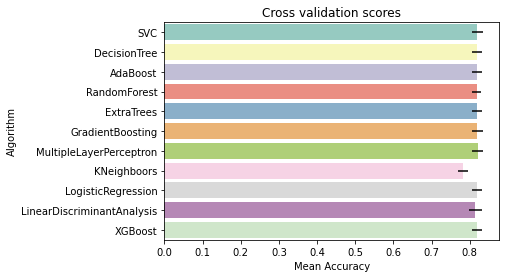

In [16]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(XGBClassifier(random_state=random_state, use_label_encoder=False))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train.iloc[:10000], y = Y_train.iloc[:10000], 
                                      scoring = "accuracy", cv = kfold, n_jobs = 4))
                                      ##[:10000]: use a subset of data to speedup cross_validation
    
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

# cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree"]})

    
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis",
                                                                                     "XGBoost"]})

g = sns.barplot("CrossValMeans", "Algorithm", data = cv_res, palette = "Set3", orient = "h", **{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [17]:
cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.8197,0.013886,SVC
1,0.8183,0.013372,DecisionTree
2,0.8183,0.013372,AdaBoost
3,0.8180,0.012853,RandomForest
4,0.8183,0.013372,ExtraTrees
5,0.8203,0.014512,GradientBoosting
6,0.8213,0.014388,MultipleLayerPerceptron
7,0.7829,0.012919,KNeighboors
8,0.8187,0.013726,LogisticRegression
9,0.8152,0.016160,LinearDiscriminantAnalysis


## Single train-test split to compare the scores of prediction from each model

In [18]:
X_0 = X_train
Y_0 = Y_train


X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_0, Y_0,
                                                   shuffle = True,
                                                   random_state = 2,
                                                   test_size = .1)

op(X_train_2.shape, Y_train_2.shape)
op(X_test_2.shape, Y_test_2.shape)

(500355, 6)

(500355,)

(55596, 6)

(55596,)

In [19]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(XGBClassifier(random_state=random_state, use_label_encoder=False))

# classifiers.append(SVC(random_state=random_state))
# classifiers.append(MLPClassifier(random_state=random_state))


accuracy_results = []
precision_results = []
recall_results = []
f1_results = []
confusion_results = []

for classifier in classifiers :
    
    classifier.fit(X_train_2, Y_train_2)
    pred = classifier.predict(X_test_2)
    
    accuracy_results.append(accuracy_score(Y_test_2, pred))
    precision_results.append(precision_score(Y_test_2, pred))
    recall_results.append(recall_score(Y_test_2, pred))
    f1_results.append(f1_score(Y_test_2, pred))
    confusion_results.append(confusion_matrix(Y_test_2, pred))

[21:57:01] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


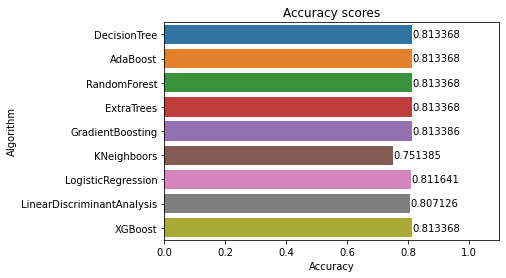

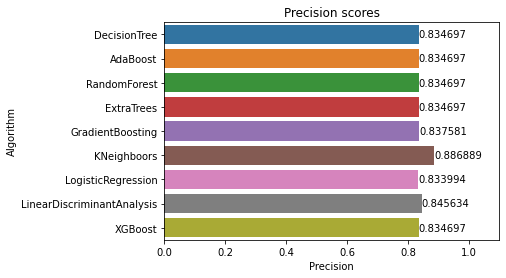

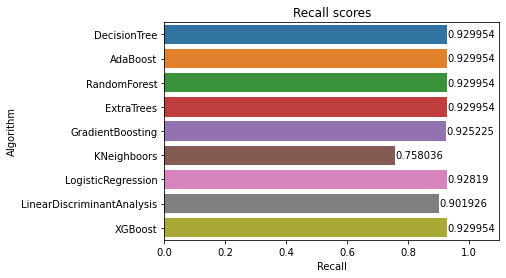

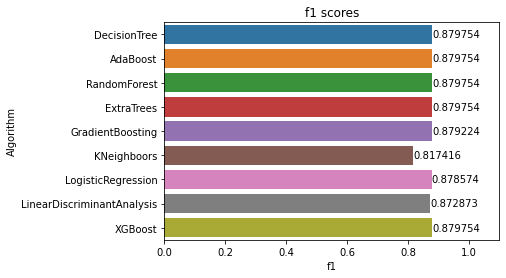

In [43]:
acc_res = pd.DataFrame({"Accuracy_scores": accuracy_results, "Algorithm": ["DecisionTree","AdaBoost","RandomForest","ExtraTrees","GradientBoosting",
               "KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","XGBoost"]})

g = sns.barplot("Accuracy_scores", "Algorithm", data = acc_res, orient = "h")
g.bar_label(g.containers[0])
g.set_xlim(0,1.1)
g.set_xlabel("Accuracy")
g = g.set_title("Accuracy scores")
plt.show()

#---------------------------------------------

prec_res = pd.DataFrame({"Precision_scores": precision_results, "Algorithm": ["DecisionTree","AdaBoost","RandomForest","ExtraTrees","GradientBoosting",
               "KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","XGBoost"]})

g = sns.barplot("Precision_scores", "Algorithm", data = prec_res, orient = "h")
g.bar_label(g.containers[0])
g.set_xlim(0,1.1)
g.set_xlabel("Precision")
g = g.set_title("Precision scores")
plt.show()

#---------------------------------------------

rec_res = pd.DataFrame({"Recall_scores": recall_results, "Algorithm": ["DecisionTree","AdaBoost","RandomForest","ExtraTrees","GradientBoosting",
               "KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","XGBoost"]})

g = sns.barplot("Recall_scores", "Algorithm", data = rec_res, orient = "h")
g.bar_label(g.containers[0])
g.set_xlim(0,1.1)
g.set_xlabel("Recall")
g = g.set_title("Recall scores")
plt.show()

#---------------------------------------------

f1_res = pd.DataFrame({"f1_scores": f1_results, "Algorithm": ["DecisionTree","AdaBoost","RandomForest","ExtraTrees","GradientBoosting",
               "KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","XGBoost"]})

g = sns.barplot("f1_scores", "Algorithm", data = f1_res)
g.bar_label(g.containers[0])
g.set_xlim(0,1.1)
g.set_xlabel("f1")
g = g.set_title("f1 scores")
plt.show()

## Plot the ROC curve for each model

In [21]:
pred_prob_train = [None] * len(classifiers)

for i in range(len(classifiers)):
    pred_prob_train[i] = classifiers[i].predict_proba(X_train_2)[:,1]

[21:53:42] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:53:43] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:53:42] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to '

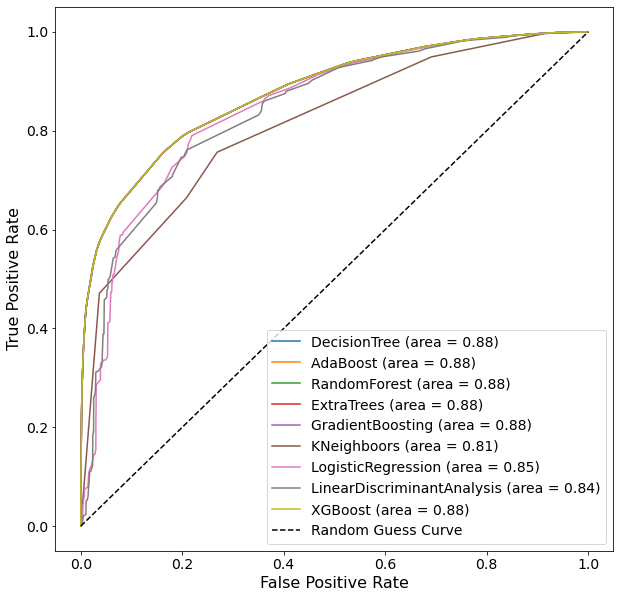

In [22]:
from sklearn.metrics import roc_auc_score

label_list = ["DecisionTree","AdaBoost","RandomForest","ExtraTrees","GradientBoosting",
               "KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","XGBoost"]

plt.figure(figsize=(10,10))

for i in range(len(classifiers)):

    fprs, tprs, cutoffs = roc_curve(Y_train_2, pred_prob_train[i])
    tmp_auc = roc_auc_score(Y_train_2, pred_prob_train[i])
    
    plt.plot(fprs, tprs, label = label_list[i] + ' (area = %.2f)' %tmp_auc)


plt.plot([0,1], [0,1], 'k--', label="Random Guess Curve")

plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

plt.show()

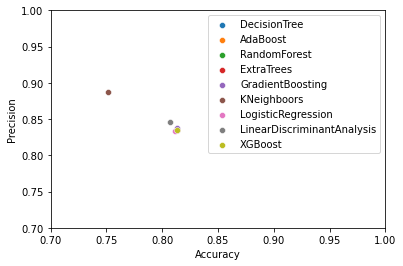

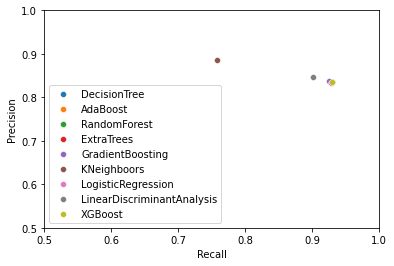

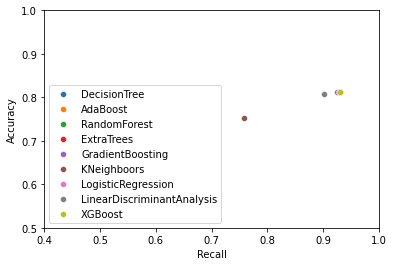

In [111]:
label_list = ["DecisionTree","AdaBoost","RandomForest","ExtraTrees","GradientBoosting",
               "KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","XGBoost"]


for i in range(len(label_list)):
    ax = sns.scatterplot([acc_res.values[i,0]], [prec_res.values[i,0]], label = label_list[i])

ax.set_xlim(0.7, 1)
ax.set_ylim(0.7, 1)
ax.legend(loc = 'upper right')
ax.set_xlabel("Accuracy")
ax.set_ylabel("Precision")
plt.show()


for i in range(len(label_list)):
    ax = sns.scatterplot([rec_res.values[i,0]], [prec_res.values[i,0]], label = label_list[i])

ax.set_xlim(0.5, 1)
ax.set_ylim(0.5, 1)
ax.legend(loc = 'lower left')
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
plt.show()


for i in range(len(label_list)):
    ax = sns.scatterplot([rec_res.values[i,0]], [acc_res.values[i,0]], label = label_list[i])

ax.set_xlim(0.4, 1)
ax.set_ylim(0.5, 1)
ax.legend(loc = 'lower left')
ax.set_xlabel("Recall")
ax.set_ylabel("Accuracy")
plt.show()

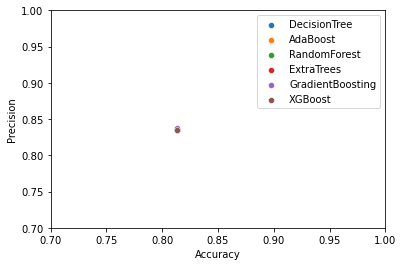

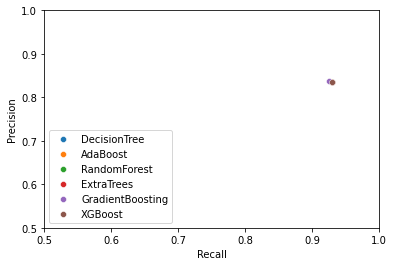

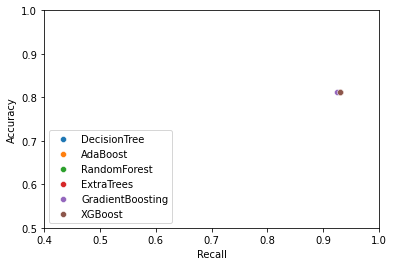

In [118]:
label_list = ["DecisionTree","AdaBoost","RandomForest","ExtraTrees","GradientBoosting",
               "KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","XGBoost"]


best_classifier = [0, 1, 2, 3, 4, 8]


for i in range(len(best_classifier)):
    ax = sns.scatterplot([acc_res.values[best_classifier[i],0]], [prec_res.values[best_classifier[i],0]], 
                         label = label_list[best_classifier[i]])

ax.set_xlim(0.7, 1)
ax.set_ylim(0.7, 1)
ax.legend(loc = 'upper right')
ax.set_xlabel("Accuracy")
ax.set_ylabel("Precision")
plt.show()


for i in range(len(best_classifier)):
    ax = sns.scatterplot([rec_res.values[best_classifier[i],0]], [prec_res.values[best_classifier[i],0]], 
                         label = label_list[best_classifier[i]])

ax.set_xlim(0.5, 1)
ax.set_ylim(0.5, 1)
ax.legend(loc = 'lower left')
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
plt.show()


for i in range(len(best_classifier)):
    ax = sns.scatterplot([rec_res.values[best_classifier[i],0]], [acc_res.values[best_classifier[i],0]], 
                         label = label_list[best_classifier[i]])

ax.set_xlim(0.4, 1)
ax.set_ylim(0.5, 1)
ax.legend(loc = 'lower left')
ax.set_xlabel("Recall")
ax.set_ylabel("Accuracy")
plt.show()

In [120]:
np.array(label_list)[best_classifier]

array(['DecisionTree', 'AdaBoost', 'RandomForest', 'ExtraTrees',
       'GradientBoosting', 'XGBoost'], dtype='<U26')

In [ ]:
# GradientBoosting seems to be the most ideal choice

In [121]:
model = GradientBoostingClassifier(random_state=random_state)
model.fit(X_train_2, Y_train_2)
pred_bs = model.predict(X_test_2)

In [122]:
pred_bs

array([1, 1, 1, ..., 0, 1, 0])

In [128]:
op(accuracy_score(Y_test_2, pred_bs),
  precision_score(Y_test_2, pred_bs),
  recall_score(Y_test_2, pred_bs),
  f1_score(Y_test_2, pred_bs))

0.8133858550974891

0.8375806773571096

0.9252254018032144

0.8792242412954147

In [130]:
confusion_matrix(Y_test_2, pred_bs)

array([[ 7457,  7323],
       [ 3052, 37764]])

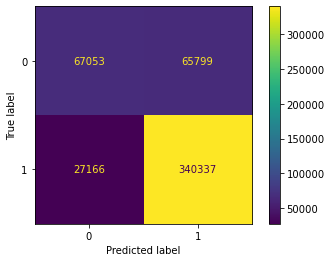

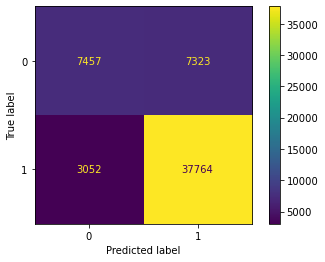

In [151]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_train_2, Y_train_2)
plot_confusion_matrix(model, X_test_2, Y_test_2)
plt.show()

In [139]:
## Best accuracy

model_cv = GradientBoostingClassifier()
gb_param_grid = {'n_estimators' : [50, 100, 150],
                 'learning_rate': [0.1, 0.05, 0.01], 'max_depth': [4, 8],
                 'max_features': [0.3, 0.1]}

gsGBC = GridSearchCV(model_cv, param_grid = gb_param_grid, cv=None, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train_2, Y_train_2)

# GBC_best = gsGBC.best_estimator_
# Best score
gsGBC.best_score_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


0.8142199038682536

In [140]:
gsGBC.best_estimator_

GradientBoostingClassifier(max_depth=4, max_features=0.1, n_estimators=150)

In [169]:
pred_tmp = gsGBC.predict(X_test_2)

op(accuracy_score(Y_test_2, pred_tmp),
  precision_score(Y_test_2, pred_tmp),
  recall_score(Y_test_2, pred_tmp),
  f1_score(Y_test_2, pred_tmp))

0.8133858550974891

0.8375806773571096

0.9252254018032144

0.8792242412954147

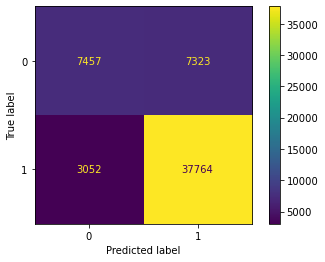

In [172]:
plot_confusion_matrix(gsGBC.best_estimator_, X_test_2, Y_test_2)
plt.show()

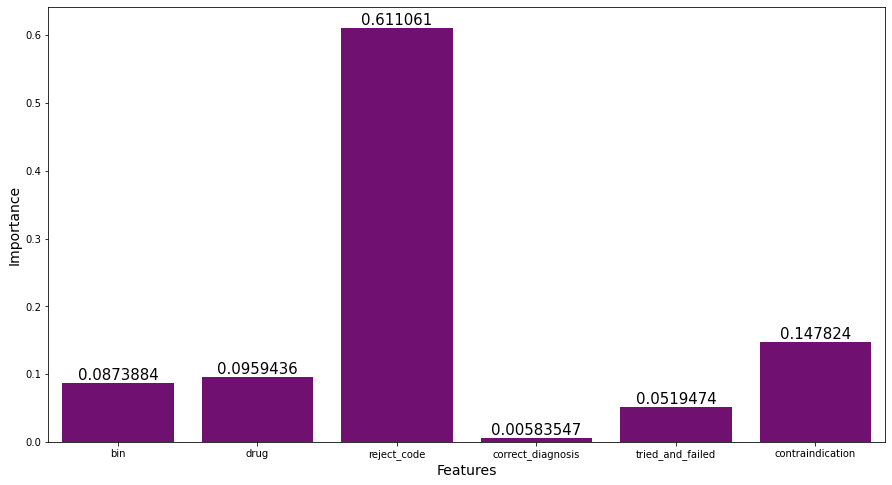

In [176]:
concat_features = ['bin', 'drug', 'reject_code', 'correct_diagnosis', 'tried_and_failed', 'contraindication']

fig, ax = plt.subplots(figsize = (15, 8))

bars = sns.barplot(concat_features, gsGBC.best_estimator_.feature_importances_, color ='purple')
bars.bar_label(bars.containers[0], fontsize = 15)
ax.set_xlabel('Features', fontsize = 14)
ax.set_ylabel('Importance', fontsize = 14)

plt.show()

In [141]:
## Best precision

model_cv = GradientBoostingClassifier()
gb_param_grid = {'n_estimators' : [50, 100, 150],
                 'learning_rate': [0.1, 0.05, 0.01], 'max_depth': [4, 8],
                 'max_features': [0.3, 0.1]}

gsGBC_2 = GridSearchCV(model_cv, param_grid = gb_param_grid, cv=None, scoring="precision", n_jobs= 4, verbose = 1)

gsGBC_2.fit(X_train_2, Y_train_2)

# GBC_best = gsGBC.best_estimator_
# Best score
gsGBC_2.best_score_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


0.8395136618179524

In [143]:
gsGBC_2.best_estimator_

GradientBoostingClassifier(max_depth=4, max_features=0.1, n_estimators=50)

In [170]:
pred_tmp = gsGBC_2.predict(X_test_2)

op(accuracy_score(Y_test_2, pred_tmp),
  precision_score(Y_test_2, pred_tmp),
  recall_score(Y_test_2, pred_tmp),
  f1_score(Y_test_2, pred_tmp))

0.8130261169868336

0.8437944985647448

0.9146413171305371

0.8777907099777802

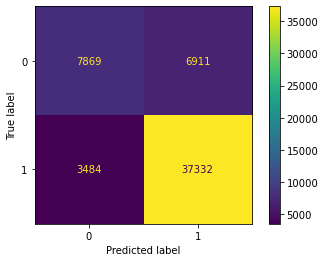

In [171]:
plot_confusion_matrix(gsGBC_2.best_estimator_, X_test_2, Y_test_2)
plt.show()

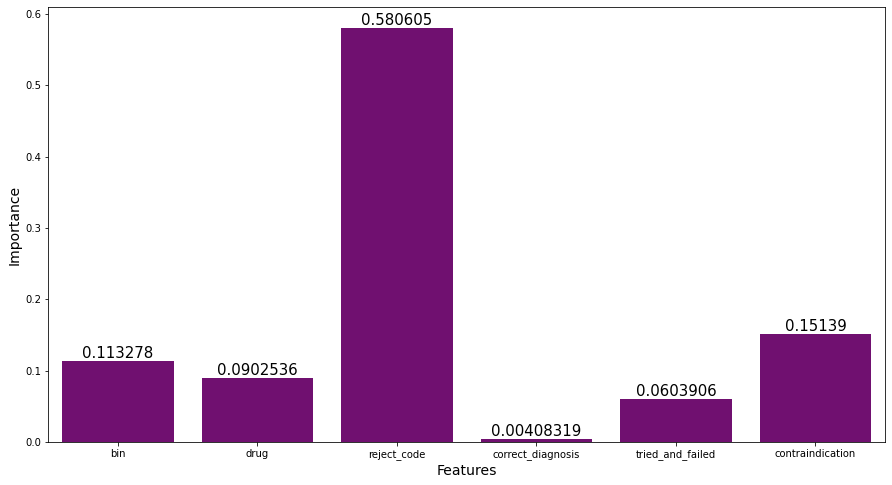

In [175]:
concat_features = ['bin', 'drug', 'reject_code', 'correct_diagnosis', 'tried_and_failed', 'contraindication']

fig, ax = plt.subplots(figsize = (15, 8))

bars = sns.barplot(concat_features, gsGBC_2.best_estimator_.feature_importances_, color ='purple')
bars.bar_label(bars.containers[0], fontsize = 15)
ax.set_xlabel('Features', fontsize = 14)
ax.set_ylabel('Importance', fontsize = 14)

plt.show()

In [178]:
import keras

## import things
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils.np_utils import to_categorical

In [442]:
del model_NN
keras.backend.clear_session()

In [443]:
## we first make an empty model
## Sequential means we'll make a group
## of a linear stack of layers
model_NN = models.Sequential()

In [416]:
# ###### ONLY RUN THIS ONCE! ##########

# ## you add a layer with .add()
# ## A Dense layer means a fully connected feedforward layer
# ## the 16 means the layer is 16 nodes tall
# ## activation='relu' means the layer uses a relu activation function
# ## the first layer needs to be told the shape of the input data
# model_NN.add(layers.Dense(16, activation='relu', input_dim = 6, kernel_initializer = 'uniform'))

# model_NN.add(layers.Dense(16, activation='relu', kernel_initializer = 'uniform'))

# # finally we add the output layer
# # this will have a single node, representing a probability
# # that the observation has positive sentiment
# # this is why the activation is a softmax
# # for more information on the softmax see the Practice Problems
# model_NN.add(layers.Dense(2, activation='softmax', kernel_initializer = 'uniform'))

In [444]:
###### ONLY RUN THIS ONCE! ##########

## you add a layer with .add()
## A Dense layer means a fully connected feedforward layer
## the 16 means the layer is 16 nodes tall
## activation='relu' means the layer uses a relu activation function
## the first layer needs to be told the shape of the input data
model_NN.add(layers.Dense(16, activation='relu', input_dim = 6, kernel_initializer = 'uniform'))

model_NN.add(layers.Dense(16, activation='relu', kernel_initializer = 'uniform'))

model_NN.add(layers.Dense(16, activation='relu', kernel_initializer = 'uniform'))

# finally we add the output layer
# this will have a single node, representing a probability
# that the observation has positive sentiment
# this is why the activation is a softmax
# for more information on the softmax see the Practice Problems
model_NN.add(layers.Dense(2, activation='softmax', kernel_initializer = 'uniform'))

In [445]:
model_NN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                112       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 2)                 34        
                                                                 
Total params: 690
Trainable params: 690
Non-trainable params: 0
_________________________________________________________________


In [446]:
# from keras.optimizers import SGD
# sgd = SGD(lr = 0.01, momentum = 0.9)

## we compile the network like so
## call .compile
## set our optimizer, optimizer='rmsprop'
## set our loss, loss='categorical_crossentropy'
## set our desired metrics, metrics=['accuracy']
model_NN.compile(optimizer='rmsprop', 
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [447]:
X_train_2_train, X_val, Y_train_2_train, Y_val = train_test_split(X_train_2.copy(), Y_train_2.copy(),
                                                                  test_size=.2,
                                                                  shuffle=True,
                                                                  stratify=Y_train_2,
                                                                  random_state=440)

In [448]:
history = model_NN.fit(X_train_2_train, to_categorical(Y_train_2_train), 
                       batch_size = 60, 
                       epochs = 10, verbose=2,
                       validation_data = (X_val, to_categorical(Y_val)))

Epoch 1/10
6672/6672 - 8s - loss: 0.4199 - accuracy: 0.8069 - val_loss: 0.3950 - val_accuracy: 0.8141 - 8s/epoch - 1ms/step
Epoch 2/10
6672/6672 - 6s - loss: 0.3817 - accuracy: 0.8119 - val_loss: 0.3745 - val_accuracy: 0.8156 - 6s/epoch - 947us/step
Epoch 3/10
6672/6672 - 6s - loss: 0.3766 - accuracy: 0.8122 - val_loss: 0.3746 - val_accuracy: 0.8108 - 6s/epoch - 928us/step
Epoch 4/10
6672/6672 - 6s - loss: 0.3760 - accuracy: 0.8122 - val_loss: 0.3751 - val_accuracy: 0.8153 - 6s/epoch - 935us/step
Epoch 5/10
6672/6672 - 6s - loss: 0.3757 - accuracy: 0.8127 - val_loss: 0.3729 - val_accuracy: 0.8152 - 6s/epoch - 932us/step
Epoch 6/10
6672/6672 - 6s - loss: 0.3755 - accuracy: 0.8127 - val_loss: 0.3711 - val_accuracy: 0.8153 - 6s/epoch - 929us/step
Epoch 7/10
6672/6672 - 6s - loss: 0.3752 - accuracy: 0.8126 - val_loss: 0.3728 - val_accuracy: 0.8155 - 6s/epoch - 927us/step
Epoch 8/10
6672/6672 - 6s - loss: 0.3751 - accuracy: 0.8126 - val_loss: 0.3773 - val_accuracy: 0.8124 - 6s/epoch - 936us

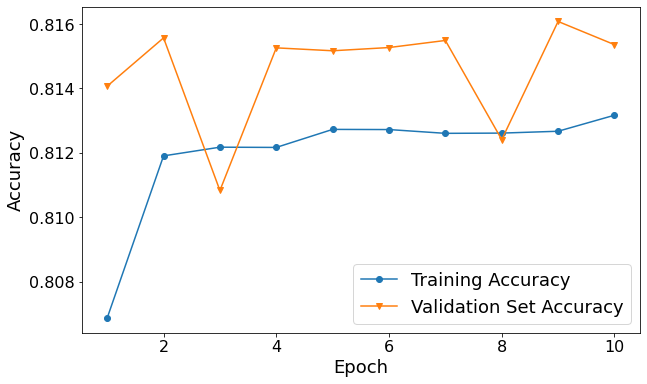

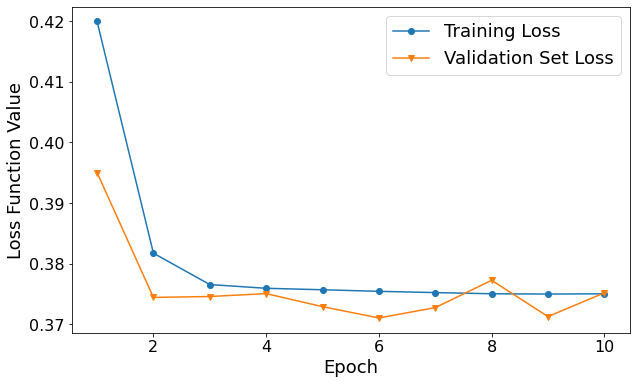

In [453]:
history_dict = history.history

n_epochs = 10

plt.figure(figsize = (10,6))

plt.plot(range(1,n_epochs+1), history_dict['accuracy'], marker='o', label = "Training Accuracy")
plt.plot(range(1,n_epochs+1), history_dict['val_accuracy'], marker='v', label = "Validation Set Accuracy")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()


plt.figure(figsize = (10,6))

plt.plot(range(1,n_epochs+1), history_dict['loss'], marker='o', label = "Training Loss")
plt.plot(range(1,n_epochs+1), history_dict['val_loss'], marker='v', label = "Validation Set Loss")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Loss Function Value", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()

In [450]:
pred_NN_prob = model_NN.predict(X_test_2)

pred_NN = np.argmax(pred_NN_prob, axis = 1)

op(accuracy_score(Y_test_2, pred_NN),
  precision_score(Y_test_2, pred_NN),
  recall_score(Y_test_2, pred_NN),
  f1_score(Y_test_2, pred_NN))

1738/1738 [==============================] - 1s 746us/step


0.8134757896251529

0.8573641955021363

0.894796158369267

0.8756803414294962

In [456]:
pred_NN[0:100]

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0])

In [458]:
Y_test_2.values[0:100]

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [460]:
import tensorflow as tf

In [464]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping: no known devices.


In [459]:
model_NN.save('./Trained_neural_networks/model_NN.h5')

In [311]:
## import load_model from keras.models
from keras.models import load_model

model_NN = load_model('./Trained_neural_networks/model_NN.h5')

In [736]:
bin_list = [1,2,3,4]
drug_list = [1,2,3]
reject_code_list = [1.0, 2.0,  3.0]
correct_diagnosis_list = [0, 1]
tried_and_failed_list = [0, 1]
contraindication_list = [0, 1]


all_realization = np.array(np.meshgrid(bin_list, drug_list, reject_code_list, 
                     correct_diagnosis_list, tried_and_failed_list, contraindication_list)).T.reshape(-1,6)

all_realization = [list(x) for x in all_realization]

In [737]:
tmp_data_list = [list(x) for x in tmp_data.drop('pa_approved', axis = 1).values]

X_train_realization = []
for i in range(len(tmp_data_list)):
    X_train_realization.append(all_realization.index(tmp_data_list[i]))
    
Y_train = tmp_data['pa_approved']

In [812]:
X_0 = X_train_realization
Y_0 = Y_train

X_train_r, X_test_r, Y_train_r, Y_test_r = train_test_split(X_0.copy(), Y_0.copy(),
                                                                  test_size=.1,
                                                                  shuffle=True,
                                                                  stratify=X_0,
                                                                  random_state=2)

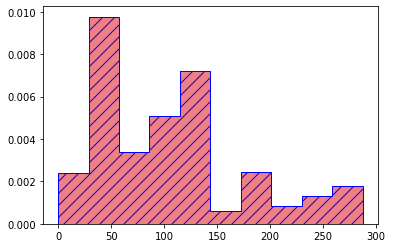

In [813]:
plt.hist(X_train_r, density = True, color = 'lightcoral')
plt.hist(X_test_r, density = True, edgecolor = 'blue', histtype='step', hatch = '//')
plt.show()

In [814]:
df_tmp = pd.DataFrame({'realizations': X_train_r.copy(), 'pa_approved': Y_train_r.copy()})
df_tmp = df_tmp.sort_values('realizations')

df_tmp

,realizations,pa_approved
216273,0,1
227005,0,0
33641,0,0
480290,0,0
21503,0,0
...,...,...
454674,287,1
453242,287,1
447386,287,1
232227,287,0


In [816]:
tmp_count = df_tmp['realizations'].value_counts(sort=False)
tmp_count_app = df_tmp['realizations'][df_tmp['pa_approved']==1].value_counts(sort=False)

# tmp_count = df_tmp['realizations'].value_counts()
# tmp_count_app = df_tmp['realizations'][df_tmp['pa_approved']==1].value_counts()

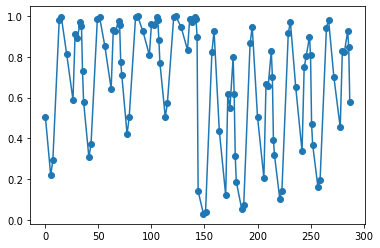

In [819]:
plt.plot(tmp_count.index, tmp_count_app/tmp_count)
plt.scatter(tmp_count.index, tmp_count_app/tmp_count)

plt.show()

In [820]:
tmp = tmp_count_app/tmp_count
tmp

0      0.503655
5      0.217706
7      0.291549
13     0.979203
15     0.995208
         ...   
280    0.829412
282    0.825417
285    0.925609
286    0.849304
287    0.580000
Name: realizations, Length: 96, dtype: float64

In [946]:
pred_base = []
for i in range(len(X_test_r)):
    r_i = X_test_r[i]
    pred_base.append(np.argmax([1-tmp[r_i], tmp[r_i]]))

In [947]:
op(accuracy_score(Y_test_r, pred_base),
  precision_score(Y_test_r, pred_base),
  recall_score(Y_test_r, pred_base),
  f1_score(Y_test_r, pred_base))

0.8154003885171595

0.8330251680407214

0.936720317009931

0.8818348243583986

In [944]:
pred_base = []
for i in range(len(X_test_r)):
    r_i = X_test_r[i]
    pred_base.append(np.random.choice(np.array([0, 1]), p=[1-tmp[r_i], tmp[r_i]]))

In [945]:
op(accuracy_score(Y_test_r, pred_base),
  precision_score(Y_test_r, pred_base),
  recall_score(Y_test_r, pred_base),
  f1_score(Y_test_r, pred_base))

0.7556119145262249

0.8336389194475003

0.834107920356147

0.8338733539560078